# San Francisco Restaurant Project

## Inspection Scores

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
raw_score_data = pd.read_csv('Restaurant_Scores_-_LIVES_Standard.csv')

In [10]:
raw_score_data.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category
0,1922,All stars Donuts,901 Clement St,San Francisco,CA,94118,37.782694,-122.468969,"(37.782694, -122.468969)",NaN,1922_20160225,02/25/2016 12:00:00 AM,86.0,Routine - Unscheduled,1922_20160225_103154,Unclean or degraded floors walls or ceilings,Low Risk
1,67448,Soo Fong Restaurant,3801 03rd St 370,San Francisco,CA,94124,37.741829,-122.388098,"(37.741829, -122.388098)",NaN,67448_20180507,05/07/2018 12:00:00 AM,92.0,Routine - Unscheduled,67448_20180507_103149,Wiping cloths not clean or properly stored or ...,Low Risk
2,1757,Dar Bar Pakistani/Indian Cusine,1412 Polk St,San Francisco,CA,94109,37.789784,-122.420455,"(37.789784, -122.420455)",NaN,1757_20170928,09/28/2017 12:00:00 AM,86.0,Routine - Unscheduled,1757_20170928_103131,Moderate risk vermin infestation,Moderate Risk
3,93022,Wise Sons Delicatessen,537 Octavia St,San Francisco,CA,94102,NaN,NaN,NaN,NaN,93022_20180907,09/07/2018 12:00:00 AM,92.0,Routine - Unscheduled,93022_20180907_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk
4,4864,DRAGON CITY BAKERY & CAFE,2367 MISSION St,San Francisco,CA,94110,37.759174,-122.419066,"(37.759174, -122.419066)",1.415583e+10,4864_20161206,12/06/2016 12:00:00 AM,84.0,Routine - Unscheduled,4864_20161206_103157,Food safety certificate or food handler card n...,Low Risk


## Data Cleaning

In [11]:
#replace 0 lat and long with np.nan
raw_score_data['business_latitude'] = raw_score_data['business_latitude'].replace(0, np.NaN)
raw_score_data['business_longitude'] = raw_score_data['business_longitude'].replace(0, np.NaN)

#drop NaN values in the colums we require 
clean_data = raw_score_data.dropna(axis=0, subset=['business_latitude', 'business_longitude', 'business_name', 'inspection_score'])
#drop unneccesary columns
clean_data = clean_data.drop(['inspection_id', 'violation_id', 'business_phone_number', 'inspection_type', 'business_location', 'violation_description'], axis = 1)
#convert inspection date to datetime object
clean_data['inspection_date'] = pd.to_datetime(clean_data['inspection_date'])
#sort the data by date and keep only the most recent inspection instance for each business
clean_data = clean_data.sort_values('inspection_date')
clean_data = clean_data.drop_duplicates('business_id', keep = 'last')
clean_data.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,inspection_date,inspection_score,risk_category
27309,7119,LO-COST MEAT MARKET #2,2918 24th St,San Francisco,CA,94110,37.752768,-122.410472,2016-02-17,77.0,Low Risk
8967,64319,Littlegreencyclo LLC,Off The Grid-Upper Haight,San Francisco,CA,NaN,37.777122,-122.419639,2016-02-19,100.0,NaN
26003,4372,CLUB PUERTORRIQUENO OF SF INC.,3249A MISSION St,San Francisco,CA,94110,37.744901,-122.420273,2016-02-26,100.0,NaN
23218,67606,Mayo & Mustard,75 Hawthorne,San Francisco,CA,94105,37.785144,-122.398383,2016-02-26,96.0,Low Risk
40620,5291,EL TONAYENSE CATERING TRUCK #2,3101 19th St,San Francisco,CA,94110,37.760583,-122.413239,2016-02-29,90.0,Low Risk


In [12]:
dropwords = ['mollie stone', 'chevron', 'shell' 'marriott', 'hilton', 'school', 'hotel', "church","cathedral","convention center", "mosque",
            "islamic","synagogue","jewish","museum","academy","temple","safeway","target","whole foods","gas","trader joe's",
            "market", "pharmacy", "cvs", "drug","hotel","marriot","westin","ritz", "steamer", "montessori ", "children", "AMC", "costco", "7-eleven"]

In [13]:
for word in dropwords: 
    droplist = list(clean_data[clean_data['business_name'].str.contains(word, case=False)].index)
    for i in droplist:
        clean_data = clean_data.drop(i)

In [14]:
clean_data.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,inspection_date,inspection_score,risk_category
8967,64319,Littlegreencyclo LLC,Off The Grid-Upper Haight,San Francisco,CA,NaN,37.777122,-122.419639,2016-02-19,100.0,NaN
26003,4372,CLUB PUERTORRIQUENO OF SF INC.,3249A MISSION St,San Francisco,CA,94110,37.744901,-122.420273,2016-02-26,100.0,NaN
23218,67606,Mayo & Mustard,75 Hawthorne,San Francisco,CA,94105,37.785144,-122.398383,2016-02-26,96.0,Low Risk
40620,5291,EL TONAYENSE CATERING TRUCK #2,3101 19th St,San Francisco,CA,94110,37.760583,-122.413239,2016-02-29,90.0,Low Risk
5485,35503,Left Coast Catering and Cafe,2152 03rd St,San Francisco,CA,94107,37.762368,-122.388877,2016-03-11,98.0,Low Risk


## Initial Exploratory Data Analysis

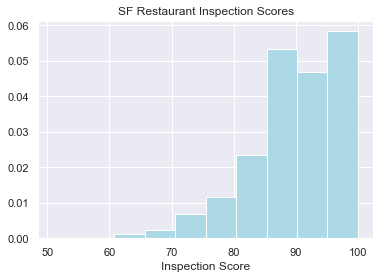

In [15]:
sns.set()
plt.hist(clean_data['inspection_score'], density=True, color ='lightblue' )
plt.title('SF Restaurant Inspection Scores')
plt.xlabel('Inspection Score')
plt.show()

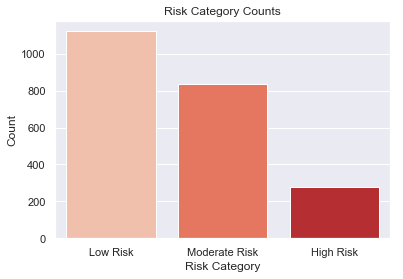

In [16]:
sns.countplot(clean_data['risk_category'], palette="Reds")
plt.xlabel("Risk Category")
plt.ylabel("Count")
plt.title("Risk Category Counts")
plt.show()

In [17]:
import json
with open('keys.json') as file:
    keys = json.load(file)
GOOGLE_KEY = keys.get('google')
YELP_KEY = keys.get('yelp')

In [18]:
from bokeh.io import output_file, show, output_notebook
from bokeh.models import ColumnDataSource, GMapOptions
from bokeh.plotting import gmap
from bokeh.transform import linear_cmap
from bokeh.palettes import Reds, Blues, Greens

In [19]:
low_scores = clean_data.loc[clean_data['inspection_score'] < 86]
mid_scores = clean_data.loc[(clean_data['inspection_score'] >= 86) & (clean_data['inspection_score'] <=92)]
high_scores = clean_data.loc[clean_data['inspection_score'] > 92]

In [20]:
output_notebook()
map_options = GMapOptions(lat=37.7749, lng=-122.4194, map_type="roadmap", zoom=11)

p = gmap(GOOGLE_KEY, map_options, title="San Francisco Restaurant Health Inspection Scores")

low_mapper = linear_cmap(field_name = 'inspection_score', palette=Reds[5], low = 50, high = 86)
mid_mapper = linear_cmap(field_name = 'inspection_score', palette=Blues[4], low = 92, high = 86)
high_mapper = linear_cmap(field_name = 'inspection_score', palette=Greens[4], low = 100, high = 92)


low = ColumnDataSource(low_scores)
mid = ColumnDataSource(mid_scores)
high = ColumnDataSource(high_scores)

p.circle(x='business_longitude', y='business_latitude', size=3, color=low_mapper, 
         fill_alpha=0.7, source=low, legend = "Low Scores")
p.circle(x='business_longitude', y='business_latitude', size=3, color=mid_mapper, 
         fill_alpha=0.7, source=mid, legend = "Mid Scores")
p.circle(x='business_longitude', y='business_latitude', size=3, color=high_mapper, 
         fill_alpha=0.7, source=high, legend = "High Scores")

p.legend.location = "top_left"
p.legend.click_policy="hide"
show(p)

Loading BokehJS ...

## Yelp Data Retrieval 

In [21]:
import requests #for querying the yelp api
import json

In [22]:
def data_collector(dataframe, index, api_key):
    """Collects Data For a Griven Restaurant From Yelp"""
    #takes data frame and index as input. Outputs Dictionary with yelp information
    #will return 0 if failure
    #json and requests are neccessary

    #datafame col names must be in original formating
    #extract search information form data frame
    name = raw_score_data.iloc[index]['business_name']
    address = raw_score_data.iloc[index]['business_address']
    lat = raw_score_data.iloc[index]['business_latitude']
    long = raw_score_data.iloc[index]['business_longitude']


    url_match = "https://api.yelp.com/v3/businesses/matches"
    url_business = "https://api.yelp.com/v3/businesses/"

    #parameters to send api are fed int the querystring
    querystring = {"name":name,"city":"San%20Francisco","state":"CA","country":"US","address1":address,"latitude": lat,"longitude":long}
    payload = ""

    #API authorization is sent through the header
    headers = {
    'Authorization': "Bearer " + api_key,
    'cache-control': "no-cache",
    }

    #query yelp API using requests
    match_response = requests.request("GET", url_match, data=payload, headers=headers, params=querystring)
    match_dict = match_response.json()
    if match_response.status_code == 429:
        return 429
    if match_response.status_code != 200:
        return 0
    if len(match_dict['businesses']) == 0:
        return 0

    business_id = match_dict['businesses'][0]['id']

    business_response = requests.request("GET", url_business + business_id, data=payload, headers=headers)

    if business_response.status_code != 200:
        return 0

    info = business_response.json()

    #return business information from yelp
    return info

In [23]:
working_clean = pd.read_csv('clean_data_initial.csv')

In [24]:
working_yelp = working_clean

In [25]:
with open('apipull') as file:
    api_data = json.load(file)

In [26]:
working_yelp['api_data'] = api_data

In [27]:
working_yelp['api_data'] = working_yelp['api_data'].replace(0, np.NaN)

In [28]:
working_yelp = working_yelp.dropna(subset=['api_data'])

In [29]:
working_yelp['price'] = working_yelp['api_data'].apply(lambda x: x.get('price'))

/Users/samsheridan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
working_yelp['rating'] = working_yelp['api_data'].apply(lambda x: x.get('rating'))
working_yelp['review_count'] = working_yelp['api_data'].apply(lambda x: x.get('review_count'))
working_yelp['hours']= working_yelp['api_data'].apply(lambda x: x.get('hours'))

/Users/samsheridan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/samsheridan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/samsheridan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [31]:
def get_cats(x):
    categories = []
    try:
        for value in x.get('categories')[0].values():
            categories.append(value)
        c = ", ".join(str(x) for x in categories)
    except:
        c = np.NaN
    return c

In [32]:
def get_trans(x):
    trans=[] 
    try:
        for val in x.get('transactions'):
            trans.append(val)   
        t = ", ".join(str(x) for x in trans)
    except: 
        t = np.NaN
    return t

In [33]:
working_yelp['categories'] = working_yelp['api_data'].apply(get_cats)
working_yelp['transactions'] = working_yelp['api_data'].apply(get_trans)

/Users/samsheridan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/samsheridan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [34]:
working_yelp.head()

,Unnamed: 0,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,inspection_date,inspection_score,risk_category,api_data,price,rating,review_count,hours,categories,transactions
1,1,4372,CLUB PUERTORRIQUENO OF SF INC.,3249A MISSION St,San Francisco,CA,94110,37.744901,-122.420273,2016-02-26,100.0,NaN,"{'id': 'oZSPzdpoPtoHrd1JxKcg1Q', 'alias': 'clu...",None,4.0,2,None,"nonprofit, Community Service/Non-Profit",
6,6,63773,Irish Times Bar and Grill,500 Sacramento St,San Francisco,CA,94111,37.794070,-122.401269,2016-03-15,92.0,Low Risk,"{'id': 'NN8LuoMKwjreggjIsJ4eRw', 'alias': 'iri...",$$,3.5,318,"[{'open': [{'is_overnight': True, 'start': '09...","irish, Irish",
7,7,67176,The Melt,1 Embarcadero Center,San Francisco,CA,94111,37.794588,-122.399642,2016-04-14,100.0,NaN,"{'id': 'nCIHn6NWFaKXDdp6_7sJzw', 'alias': 'the...",$,3.5,509,"[{'open': [{'is_overnight': False, 'start': '1...","tradamerican, American (Traditional)",
8,8,1567,TANPOPO,1740 BUCHANAN St,San Francisco,CA,94115,37.785961,-122.429776,2016-04-19,87.0,Low Risk,"{'id': 'ld0mW_4EUFVK-izi5mD3GA', 'alias': 'tan...",$$,3.5,1359,"[{'open': [{'is_overnight': False, 'start': '1...","ramen, Ramen","pickup, delivery"
11,11,7361,PastaGina,741 Diamond St,San Francisco,CA,94114,37.751403,-122.436286,2016-05-03,86.0,Moderate Risk,"{'id': 'EYt9l0w1t5uFqJlCx758AA', 'alias': 'pas...",$$,4.5,164,"[{'open': [{'is_overnight': False, 'start': '1...","pastashops, Pasta Shops",


In [35]:
working_yelp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2179 entries, 1 to 2495
Data columns (total 19 columns):
Unnamed: 0              2179 non-null int64
business_id             2179 non-null int64
business_name           2179 non-null object
business_address        2179 non-null object
business_city           2179 non-null object
business_state          2179 non-null object
business_postal_code    2160 non-null object
business_latitude       2179 non-null float64
business_longitude      2179 non-null float64
inspection_date         2179 non-null object
inspection_score        2179 non-null float64
risk_category           1976 non-null object
api_data                2179 non-null object
price                   2019 non-null object
rating                  2179 non-null float64
review_count            2179 non-null int64
hours                   1989 non-null object
categories              2178 non-null object
transactions            2179 non-null object
dtypes: float64(4), int64(3), object(